In [1]:
# check version
from pycaret.utils import version
version()

'2.3.6'

In [2]:
import pandas as pd
import numpy as np
import warnings
import optuna
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv(r"C:\Users\jloom\Desktop\hub_projects\healthcare_covid19\PyCaret Mahine Learning pred\healthcare_pycaret.csv")

In [4]:
#df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df

,Available Extra Rooms in Hospital,Bed Grade,Visitors with Patient,Admission_Deposit,Stay,Hospital_code_1,Hospital_code_2,Hospital_code_3,Hospital_code_4,Hospital_code_5,Hospital_code_6,Hospital_code_7,Hospital_code_8,Hospital_code_9,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,Hospital_code_16,Hospital_code_17,Hospital_code_18,Hospital_code_19,Hospital_code_20,Hospital_code_21,Hospital_code_22,Hospital_code_23,Hospital_code_24,Hospital_code_25,Hospital_code_26,Hospital_code_27,Hospital_code_28,Hospital_code_29,Hospital_code_30,Hospital_code_31,Hospital_code_32,Hospital_type_code_a,Hospital_type_code_b,Hospital_type_code_c,Hospital_type_code_d,Hospital_type_code_e,Hospital_type_code_f,Hospital_type_code_g,City_Code_Hospital_1,City_Code_Hospital_2,City_Code_Hospital_3,City_Code_Hospital_4,City_Code_Hospital_5,City_Code_Hospital_6,City_Code_Hospital_7,City_Code_Hospital_9,City_Code_Hospital_10,City_Code_Hospital_11,City_Code_Hospital_13,Hospital_region_code_X,Hospital_region_code_Y,Hospital_region_code_Z,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Ward_Facility_Code_A,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,City_Code_Patient_1.0,City_Code_Patient_2.0,City_Code_Patient_3.0,City_Code_Patient_4.0,City_Code_Patient_5.0,City_Code_Patient_6.0,City_Code_Patient_7.0,City_Code_Patient_8.0,City_Code_Patient_9.0,City_Code_Patient_10.0,City_Code_Patient_11.0,City_Code_Patient_12.0,City_Code_Patient_13.0,City_Code_Patient_14.0,City_Code_Patient_15.0,City_Code_Patient_16.0,City_Code_Patient_18.0,City_Code_Patient_19.0,City_Code_Patient_20.0,City_Code_Patient_21.0,City_Code_Patient_22.0,City_Code_Patient_23.0,City_Code_Patient_24.0,City_Code_Patient_25.0,City_Code_Patient_26.0,City_Code_Patient_27.0,City_Code_Patient_28.0,City_Code_Patient_29.0,City_Code_Patient_30.0,City_Code_Patient_31.0,City_Code_Patient_32.0,City_Code_Patient_33.0,City_Code_Patient_34.0,City_Code_Patient_35.0,City_Code_Patient_36.0,City_Code_Patient_37.0,City_Code_Patient_38.0,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Extreme,Severity of Illness_Minor,Severity of Illness_Moderate,Age_0-10,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100
0,3,2.0,2,4911.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,2,2.0,2,5954.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,2.0,2,4745.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,2,2.0,2,7272.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2,2.0,2,5558.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [6]:
df.columns

Index(['Available Extra Rooms in Hospital', 'Bed Grade',
       'Visitors with Patient', 'Admission_Deposit', 'Stay', 'Hospital_code_1',
       'Hospital_code_2', 'Hospital_code_3', 'Hospital_code_4',
       'Hospital_code_5',
       ...
       'Age_0-10', 'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50',
       'Age_51-60', 'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100'],
      dtype='object', length=128)

In [7]:
from pycaret.classification import *

In [8]:
# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
clf=setup(data=df,
          target='Stay',
          remove_multicollinearity=True,
          fix_imbalance=True,
          data_split_stratify= True)

,Description,Value
0,session_id,5713
1,Target,Stay
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(318438, 128)"
5,Missing Values,0
6,Numeric Features,3
7,Categorical Features,124
8,Ordinal Features,0
9,High Cardinality Features,0


### we choose the best model

In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
# This model will be used to compare all the model along with the cross validation
best_model=compare_models(include=["lightgbm","gbc"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7305,0.7758,0.8788,0.7617,0.8161,0.3213,0.3330,10.3960
gbc,Gradient Boosting Classifier,0.7173,0.7590,0.8499,0.7620,0.8036,0.3045,0.3103,70.0560


### create the model

In [11]:
#light GBM Model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7287,0.7751,0.8776,0.7605,0.8149,0.3166,0.3282
1,0.7351,0.7763,0.8833,0.7642,0.8195,0.3321,0.3447
2,0.7278,0.7698,0.8800,0.7586,0.8148,0.3118,0.3243
3,0.7316,0.7799,0.8785,0.7629,0.8166,0.3249,0.3364
4,0.7315,0.7744,0.8789,0.7627,0.8167,0.3243,0.3359
5,0.7312,0.7746,0.8784,0.7626,0.8164,0.3239,0.3354
6,0.7292,0.7743,0.8757,0.7619,0.8149,0.3199,0.3308
7,0.7285,0.7738,0.8768,0.7607,0.8146,0.3167,0.3281
8,0.7327,0.7822,0.8837,0.7616,0.8181,0.3240,0.3371
9,0.7287,0.7774,0.8751,0.7616,0.8145,0.3187,0.3296


In [12]:
lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5713, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### Tuning the hyperparametes for better performance

In [13]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)],
    'colsample_bytree': [0.4,0.6,0.7, 0.8],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'num_leaves': [int(x) for x in np.linspace(start = 20, stop = 3000, num = 20)],
    'reg_alpha': [1.1, 1.2, 1.3, 2, 3, 4, 5, 20, 50],
    'reg_lambda': [1.1, 1.2, 1.3, 2 , 3, 4, 5, 20, 50],
    'min_split_gain': [0.3, 0.4],
    "max_bin": [200, 300],
    "min_data_in_leaf": [int(x) for x in np.linspace(start = 200, stop = 10000, num =100)],
    "min_gain_to_split": [0, 15],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20],
    "learning_rate": [0.01,0.001,0.1,0.3],
    "lambda_l1": [int(x) for x in np.linspace(0,100,num = 5)],
    "lambda_l2": [int(x) for x in np.linspace(0,100,num = 5)],
    'reg_alpha': [0, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1, 5, 10, 20, 50, 100],
    "bagging_fraction": [0.2, 0.4,0.6,0.8,0.95],
    "feature_fraction": [0.2, 0.4,0.6,0.8,0.95],
    "bagging_freq": [1]}

In [14]:
#Hyper params tuning via tune_model
tuned_lightgbm  = tune_model(lightgbm,
                             #search_library = 'optuna'
                             search_algorithm = "random",  #"random"
                             custom_grid = param_grid,
                             early_stopping=True)
                             #early_stopping_round=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7280,0.7719,0.8665,0.7650,0.8126,0.3238,0.3323
1,0.7302,0.7727,0.8690,0.7660,0.8143,0.3287,0.3375
2,0.7221,0.7649,0.8644,0.7601,0.8089,0.3072,0.3159
3,0.7285,0.7759,0.8662,0.7656,0.8128,0.3257,0.3340
4,0.7284,0.7693,0.8685,0.7644,0.8132,0.3234,0.3323
5,0.7289,0.7711,0.8670,0.7657,0.8132,0.3263,0.3348
6,0.7254,0.7701,0.8659,0.7627,0.8110,0.3164,0.3250
7,0.7279,0.7706,0.8663,0.7650,0.8125,0.3238,0.3323
8,0.7298,0.7780,0.8711,0.7646,0.8144,0.3255,0.3351
9,0.7279,0.7718,0.8646,0.7657,0.8122,0.3250,0.3330


In [15]:
tuned_lightgbm

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=0.7, feature_fraction=0.8,
               importance_type='split', lambda_l1=50, lambda_l2=25,
               learning_rate=0.01, max_bin=200, max_depth=40,
               min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=1882, min_gain_to_split=0, min_split_gain=0.4,
               n_estimators=733, n_jobs=-1, num_leaves=961, objective=None,
               random_state=5713, reg_alpha=2, reg_lambda=1, silent='warn',
               subsample=0.9, subsample_for_bin=200000, subsample_freq=20)

In [16]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

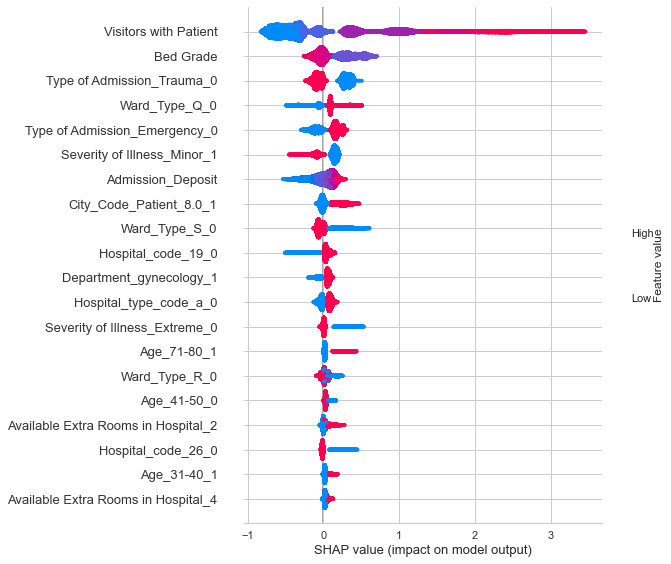

In [17]:
interpret_model(tuned_lightgbm)

In [18]:
#predict_new = predict_model(tuned_lgbm, data=df)
#predict_new.head()

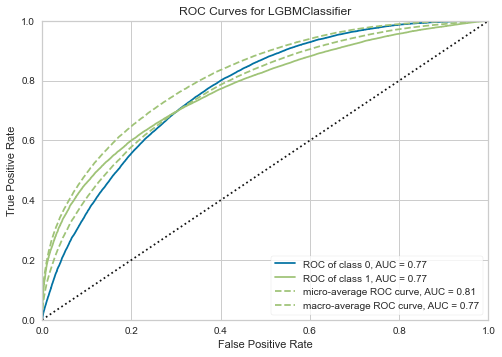

In [19]:
plot_model(tuned_lightgbm, plot = 'auc')

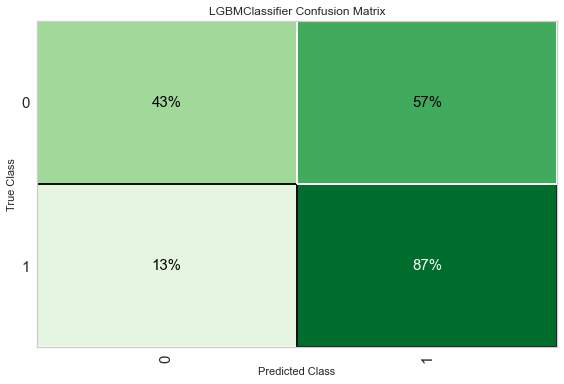

In [38]:
plot_model(tuned_lightgbm, plot='confusion_matrix',plot_kwargs = {'percent' : True})

In [21]:
#plot_model(tuned_lightgbm, plot='learning')

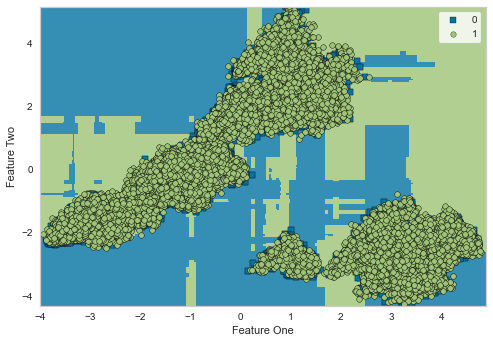

In [22]:
plot_model(tuned_lightgbm, plot='boundary')

In [23]:
gbc= create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7134,0.7566,0.8444,0.7608,0.8004,0.2972,0.3024
1,0.7180,0.7602,0.8497,0.7628,0.8039,0.3068,0.3125
2,0.7156,0.7540,0.8535,0.7588,0.8033,0.2964,0.3032
3,0.7169,0.7618,0.8440,0.7645,0.8023,0.3084,0.3131
4,0.7170,0.7587,0.8484,0.7625,0.8032,0.3050,0.3105
5,0.7197,0.7590,0.8533,0.7629,0.8056,0.3092,0.3154
6,0.7149,0.7564,0.8522,0.7587,0.8027,0.2954,0.3020
7,0.7186,0.7570,0.8528,0.7620,0.8049,0.3061,0.3124
8,0.7220,0.7667,0.8527,0.7655,0.8067,0.3169,0.3228
9,0.7165,0.7594,0.8485,0.7619,0.8029,0.3034,0.3090


### blend CLASSIFIERS

In [26]:
blend_specific_soft = blend_models(estimator_list = [gbc,tuned_lightgbm], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7214,0.7669,0.8598,0.7615,0.8077,0.3089,0.3165
1,0.7272,0.7692,0.8640,0.7654,0.8117,0.3235,0.3314
2,0.7204,0.7621,0.8633,0.7589,0.8078,0.3028,0.3114
3,0.7256,0.7714,0.8611,0.7652,0.8103,0.3209,0.3283
4,0.7250,0.7666,0.8625,0.7639,0.8102,0.3178,0.3257
5,0.7265,0.7678,0.8660,0.7638,0.8117,0.3197,0.3282
6,0.7223,0.7660,0.8624,0.7612,0.8087,0.3095,0.3177
7,0.7246,0.7663,0.8623,0.7636,0.8099,0.3169,0.3247
8,0.7270,0.7750,0.8658,0.7643,0.8119,0.3211,0.3296
9,0.7236,0.7683,0.8594,0.7640,0.8089,0.3163,0.3235


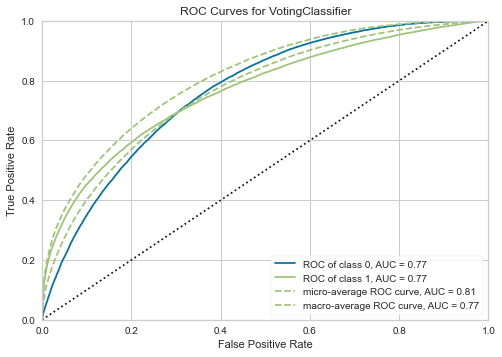

In [27]:
plot_model(blend_specific_soft)

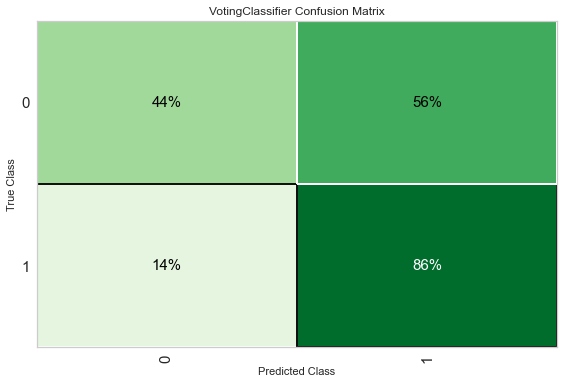

In [33]:
plot_model(blend_specific_soft, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

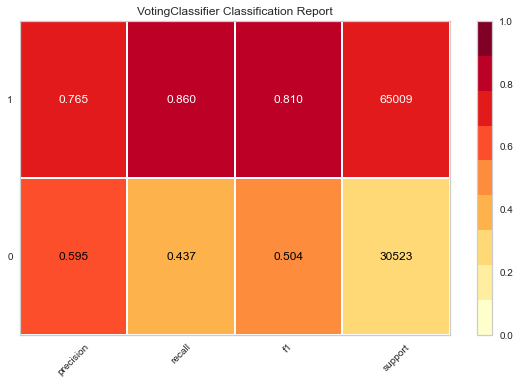

In [37]:
plot_model(blend_specific_soft, plot = "class_report")